In [523]:
from collections import Counter
import datetime
from collections import defaultdict
from functools import reduce
import gensim
from gensim import corpora
import group_tweets 
import h5py
import json
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize.casual import TweetTokenizer
#from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import pandas as pd
import pickle
import random
import re
from scipy import spatial
import seaborn as sns
import spacy
from spacy.lang.en import English
from spacy import displacy
#!python -m spacy download en_core_web_md #you will need to install this on first load

#nlp = spacy.load('en_core_web_md')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [223]:
# Load Google's pre-trained Word2Vec model. Make sure you're running python 64-bit otherwise this might fail to load
model = gensim.models.KeyedVectors.load_word2vec_format('/home/priyav/coursework/cs109a/project/TrumpTweets/tweets/word2vec_google/GoogleNews-vectors-negative300.bin.gz', binary=True)  

In [248]:
tweet_embeddings_dict = defaultdict(list)

def get_tweet_embeddings(tweet):
    if not isinstance(tweet, str):
        return []
    tokens = parser(tweet)

    valid_tokens = []
    for token in tokens:
        token = str(token).lower()
        if token in model:
            if token not in tweet_embeddings_dict:
                tweet_embeddings_dict[token] = model[token]
            valid_tokens.append(token)
        else:
            print("Token: {} is not found in Word2Vec model".format(token))
    return(valid_tokens)
            

In [249]:
clean_tweets = pd.read_csv('cleaned_tweets')
tweet_tokens = [get_tweet_embeddings(t) for t in clean_tweets.clean_text]

Token: gopoversight is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: repadamschiff is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: 78 is not found in Word2Vec model
Token: repmattgaetz is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: gaetz is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: ' is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ' is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: repdougcollins is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: schiff is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token

Token: … is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: j. is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: loudobbs is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: 2016 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not fou

Token: teamcavuto is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: kimberley is not found in Word2Vec model
Token: strassel is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ericmetaxas is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: / is not found in Word2Vec model
Token: katrinatrinko is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: dailysignal is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: judicialwatch is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: judicialwatch is not found in Word2Vec model
Token: tomfitton is not found in Word2Vec model
Token: 1.59 is not found in W

Token: ” is not found in Word2Vec model
Token: katiepavlich is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: kimberley is not found in Word2Vec model
Token: strassel is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Toke

Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: kiriakou is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: tuckercarlson is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token:

Token: “ is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: 7000 is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not fou

Token: : is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: gopchairwoman is not found in Word2Vec model
Token: parscale is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: realdonaldtrump!http is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in W

Token: 9:00 is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: v.p. is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: sencapito is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: senshelby is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: an

Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: w_terrence is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: lewandowski is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: ivankatrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: 2017 is not found in Word2Vec model
Token: ’ve is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: ivankatrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: 2.9 is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 5.3 is not found in Word2Vec model
Token: ) is not found in Wor

Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: mike_pence is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: mike_pence is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: ivankatrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: w/ is not found in Word2Vec model
Token: +175 is not found in Word2Vec model
Token: aiingovsummit is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: … is not found in 

Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: loudobbs is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: comey is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: loudobbs is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: alandersh is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: tillis is not found in Word2Vec model
Toke

Token: comey is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: meetthepress is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: mcintosh is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: meetthepress is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: tariffs?davidmmcintosh is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: " is not fo

Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: loudobbs is not found in Word2Vec model
Token: seanhannity is not found in Word2Vec model
Token: 9:00 is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: n’t

Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: .. is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: rep. is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: tlaib is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec m

Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: 2020 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: dobbs is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: peterschweizer is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: .sundarpichai is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: 2016 is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: to is not found in Word2

Token: ) is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: elijah is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: mr. is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: elijah is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: elijah is 

Token: . is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: gopchairwoman is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: – is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: danielledsouzag is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: danielledsouzag is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: 🇺 is not found in Word2Vec model
Token: 🇸 is not found in Word2Vec model
Token: deneenborelli is not found in Word2Vec

Token: and is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ⛳ is not found in Word2Vec model
Token: trumpgolftune is not found in Word2Vec model
Token: golfchannel is not found in Word2Vec model
Token: theopen is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: mueller is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: paretweetisan is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: 2016 is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: seanhannity is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is 

Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: 🇺 is not found in Word2Vec model
Token: 🇸 is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: mzhemingway is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: https:/ is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: regnery is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: kavanaugh is not found in Word2Vec model
Token

Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: kushner is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: " is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: flotus is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: bebest is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Tok

Token: : is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: saudiarabia is not found in Word2Vec model
Token: houthis is not found in Word2Vec model
Token: irgc is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: marcorubio is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: attackscommon is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: irgc is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: marcorubio is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: irgc is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: hughhewitt 

Token: and is not found in Word2Vec model
Token: flotus is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: buckingham is not found in Word2Vec model
Token: palac is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: royalfamily is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: clarencehouse is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: kensingtonroyal is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is

Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: 1994 is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: ' is not found in Word2Vec model
Token: ' is not found in Word2Vec model
Token: japantimes is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: naruhito is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: memorialday is not found in Word2Vec m

Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: to is not fo

Token: u.s. is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: tomfitton is not found in Word2Vec model
Token: judicialwatch is not found in Word2Vec model
Token:

Token: u.s. is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 25 is not found in Word2Vec model
Token: 325 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: 100 is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not foun

Token: . is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: judicialwatch is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: .tomfitton is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: comey is not found in Word2Vec model
Token: mccabe is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: judicialwatch is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: tomfitton is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: judicialwatch is not found in Word2Vec model
Token: : is not found in Word2Vec model
T

Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: abeshinzo is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: 昨日の首脳会談、4人だけの夕食会、そして本日のゴルフと、トランプ大統領と10時間以上を共に過ごすなかで、北朝鮮問題への対応、経済、g20大阪サミット、更には世界情勢に至るまで、様々な課題についてじっくりと話をすることができました is not found in Word2Vec model
Token: 。 is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in W

Token: . is not found in Word2Vec model
Token: intr is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: marklevinshow is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: mittromney is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: marklevinshow is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: danscavino is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ivankatrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: d'ivoire is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: wgdp is 

Token: mike_pence is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: .realdonaldtrump is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: cbp is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: mike_pence is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: – is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: – is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not fou

Token: - is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 2016 is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: mueller is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: bretbaier is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not

Token: … is not found in Word2Vec model
Token: gopchairwoman is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: .realdonaldtrump is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: o.k. is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: / is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: chuckrossdc is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: bolst is not found in Word

Token: 11:30 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: u.k. is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 25 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: warmbier is not found in Word2Vec model
Token: . is no

Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: dilanian is not found in Word2Vec model
Token: nbcnews is not found in Word2Vec model
Token: kimstrassel is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: kimstrassel is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: mccabe is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: 

Token: “ is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: 24 is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: jacknicklaus is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: tigerwoods is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model


Token: : is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: jerrymoran is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: senrobportman is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: senatorlankford is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: jiminhofe is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: . is n

Token: and is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: ’ is not found in Wor

Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: 25 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: . is not found in Wo

Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: foxandfriends is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: schumer is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: 2006 is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . 

Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: nctl2018 is not found in Word2Vec model
Token: 🎄 is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: 600 is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: g.m. is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: g.m. is not found in Word2Vec model
Token: ! i

Token: of is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ’m is not found in Word2Vec model
Token: ’ve is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: 105 is not found in 

Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: – is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: – is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: .walkerstapleton is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: breckenridge is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: rosendale is not found in Word2Vec model
Token: ( is not found in 

Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: toyotacenter is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: 🇺 is not found in Word2Vec model
Token: 🇸 is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: jobsnotmobs is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: andrews_jba is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec mod

Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: flotus is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: 🇪 is not found in Word2Vec model
Token: 🇬 is not found in Word2Vec model
Token: 🇺 is not found in Word2Vec model
Token: 🇸 is not found in Word2Vec model
Token: flotus is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: 🇰 is not found in Word2Vec model
Token: 🇪 is not found in Word2Vec model
Token: 🇺 is not found in Word2Vec model
Token: 🇸 is not found in Word2Vec model
Token: .flgovscott is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: okeechobee is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token:

Token: ! is not found in Word2Vec model
Token: 18 is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: kavanaugh is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: to is not foun

Token: hurricaneflorence is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: uscg is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: carolinas is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Tok

Token: - is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ’m is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: / is not found in Wor

Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: desantis is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: .strong is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . 

Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: foxconn is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 15000 is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: u.s. is n

Token: u.s. is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: 27 is not found in Word2Vec model
Token: 4months is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: biretweethday is not found in Word2Vec model
Token: uscg is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: balderson is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ) is not found in Word2Vec mod

Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: 817 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: jarrett is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: sinclair is 

Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: 12 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: 25000 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: turnberry is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: -

Token: of is not found in Word2Vec model
Token: ms-13 is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: elelments is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: nov. is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: maxine is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token:

Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not foun

Token: 2018 is not found in Word2Vec model
Token: 00:25:53,24521,101649,false,1008506045373845504 is not found in Word2Vec model
Token: 
 is not found in Word2Vec model
Token: , is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: https://t.co/1legof68lb,06-17-2018 is not found in Word2Vec model
Token: 16:55:13,11369,0,true,1008392634468093955 is not found in Word2Vec model
Token: 
 is not found in Word2Vec model
Token: , is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: standard!,06 is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: 17 is not found in Word2Vec model
Token: - is not found i

Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: melania is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: w.h. is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: n.y. is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ceejay is not found in Word2Vec model
Token: metcalf is not found in Word2Vec model
Token: foxandfriends is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec 

Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: schumer is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: zte is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: 1.3 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: a

Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: candace is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: 91 is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ( is not foun

Token: ” is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: comey is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token:    is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found 

Token: . is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: mueller is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: rosenstein is not found in Word2Vec model
Token: fisa is not found in Word2Vec model
Token: comey is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to 

Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: comey is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: mccabe is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: “ is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: 14-year is not found in Word2Vec model
Token: ” is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: tarkanian is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: a is not found in Word2Vec model


Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 1957 is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: – is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a.g. is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: fisa is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: comey is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: i.g. is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: !

Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not fou

Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: govmattbevin is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: 

Token: ” is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: haitians is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: daca is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: daca is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: daca is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is no

Token: ! is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: mccabe is not found in Word2Vec model
Token: leakin is not found in Word2Vec model
Token: ’ is not found in Word2Vec model
Token: comey is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: 33000 is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: 700000 is not found in Word2Vec model
Token: ’s is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: erictrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: journalismisdead is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: : is not found in Wo

Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: senatemajldr is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: senorrinhatch is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
T

Token: ) is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: n’t is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: zinke is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: 2016/2017 is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ncaachampions is not found in Word2Vec model
Token: 🏆 is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: and is not found in Word2Vec model
To

Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ingrahamangle is not found in Word2Vec model
Token: 10:00 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: tuckercarlson is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: comey is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: brazile is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Wor

Token: of is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: taxreform is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: taxreform is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: w/ is not found in Word2Vec model
Token: o'care is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of

Token: ricardorossello is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: prstrong is not found in Word2Vec model
Token: 🇵 is not found in Word2Vec model
Token: 🇷 is not found in Word2Vec model
Token: presssec is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: .potus is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: flotus is not found in Word2Vec model
Token: w/ is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: kearsarge is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: seanhannity is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: ivankatru

Token: . is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ? is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: fuctupmind is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: crookedhillary is not found in Word2Vec model
Token: team_trump45 is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: team_trump45 is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: team_trump45 is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: 

Token: of is not found in Word2Vec model
Token: hurricaneharvey is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: w/ is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: govabbott is not found in Word2Vec model
Token: dhsgov is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 85 is not found in Word2Vec model
Token: arpaio is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: realdonaldtrump is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found i

Token: of is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 24/7 is not found in Word2Vec model
Token: wapo is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in

Token: a is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ussgeraldrford: is not found in Word2Vec model
Token: ☑ is not found in Word2Vec model
Token: ️keep is not found in Word2Vec model
Token: 🇺 is not found in Word2Vec model
Token: 🇸 is not found in Word2Vec model
Token: ☑ is not found in Word2Vec model
Token: ️protect is not found in Word2Vec model
Token: 🇺 is not found in Word2Vec model
Token: 🇸 is not found in Word2Vec model
Token: ☑ is not found in Word2Vec model
Token: ️defend is not found in Word2Vec model
Token: 🇺 is not found in Word2Vec model
Token: 🇸 is not found in Word2Vec model
Token: ☑ is not found in Word2Vec model
Token: ️love is not found in Word2Vec model
Token: 🇺 is not found in Word2Vec model
Token: 🇸 is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: 100000 is not found in Word2Vec mod

Token: . is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: charliegard is not found in Word2Vec model
Token: u.k. is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: ( is not found in Word2Vec model
Token: ) is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not

Token: donaldjtrumpjr is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: warmbier is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: diamondandsilk is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token:   is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: rasmussen is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: 2016 is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: 50 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: 's is not found in Word2

Token: . is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ' is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: integrity' is not found in Word2Vec model
Token: ➡ is not found in Word2Vec model
Token: ️ is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: ' is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ' is not found in Word2Vec model
Token: … is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: disgrace!draintheswamp is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: comey is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: . is not found in Word2Vec model
T

Token: flotus is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: address- is not found in Word2Vec model
Token: drudge_reporetweet is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: ' is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ' is not found in Word2Vec model
Token: ... is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: u.s.a. is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec 

Token: to is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: repcummings is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: : is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: 2015 is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: randpaul is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: a is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Tok

Token: .vp is not found in Word2Vec model
Token: 's is not found in Word2Vec model
Token: marchforlife is not found in Word2Vec model
Token: -- is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: marchforlife is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: u.s. is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: to is not found in Word2Vec model
Token: of is not found in Word2Vec model
Token: votestand is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: and is not found in Word2Vec model
Token: 3000000 is not found in Word2Vec model
Token: . is not found in Word2Vec model
Token: ! is not found in Word2Vec model
Token: - is not found in Word2Vec model
Token: dade is not found in Wo

In [559]:
# clean the tweet tokens
tweet_tokens = list(filter(lambda t: isinstance(t, list), tweet_tokens))

11717

In [252]:
word_embed_df = pd.DataFrame(tweet_embeddings_dict)

In [260]:
word_embed_df.T.to_csv('data/tweet_words_word2vec_embed.txt', header=False, sep=" ")

Part 2: Compare previously chosen "keywords" to all other words in corpus using cosine similarity

In [513]:
keywords = [s.split("_")[1] for s in filter(lambda x: "keyword" in x,  clean_tweets.columns)]
print(keywords)

['China', 'Russia', 'Mexico', 'Canada', 'Korea', 'Clinton', 'Democrats', 'Republicans', 'himself', 'family', 'government', 'media', 'states', 'social', 'Obama', 'FBI', 'rivals', 'MiddleEast', 'Ukraine', 'economy', 'disaster']


In [515]:
keyword_embeddings = [model[k] for k in keywords]

In [526]:
token_keyword_sim = defaultdict(list)
for token, e in tweet_embeddings_dict.items():
    try:
        token_keyword_sim[token] = [1-spatial.distance.cosine(e, k) for k in keyword_embeddings]
    except:
        print(token)

True


In [528]:
token_keyword_sim_df = pd.DataFrame(token_keyword_sim,
                                    index=keywords).T

# For each keyword (column), find the 10 most similar other words in corpus
n = 10
for k in keywords:
    keywd_cosine = token_keyword_sim_df.index[token_keyword_sim_df[k].argsort()[-n:][::-1]]
    print(k, keywd_cosine)

China Index(['countries', 'chinese', 'korea', 'global', 'nations', 'beijing',
       'communist', 'overseas', 'world', 'foreign'],
      dtype='object')
Russia Index(['russia', 'republics', 'russian', 'nations', 'countries', 'oligarchs',
       'oligarch', 'soviet', 'superpower', 'russians'],
      dtype='object')
Mexico Index(['mexico', 'mexican', 'cartels', 'hemisphere', 'argentine', 'ranchers',
       'border', 'cartel', 'mesa', 'panhandle'],
      dtype='object')
Canada Index(['province', 'canadian', 'countries', 'world', 'country', 'canadians',
       'canada', 'globally', 'worldwide', 'globe'],
      dtype='object')
Korea Index(['korea', 'jae', 'jong', 'hyun', 'hong', 'jung', 'gu', 'rok', 'chol',
       'korean'],
      dtype='object')
Clinton Index(['presidential', 'senator', 'clinton', 'surrogates', 'primaries',
       'presidency', 'lady', 'administration', 'voters', 'aides'],
      dtype='object')
Democrats Index(['conservatives', 'liberals', 'senators', 'progressives', 'demo

In [542]:
sum(clean_tweets[clean_tweets.columns[["keyword" in c for c in clean_tweets.columns]]].sum(axis=1) ==0)
#clean_tweets[["keyword" in c for c in clean_tweets.columns]]

2614

In [617]:
pd.Series([len(t) for t in tweet_tokens]).sort_values(ascending=False)
clean_tweets.iloc[8020]

Unnamed: 0                                                              8020
Unnamed: 0.1                                                            8020
Unnamed: 0.1.1                                                          8020
retweet_count                                                          13955
favorite_count                                                             0
is_retweet                                                                 0
num_words                                                               2675
num_hashtags                                                               9
num_mentions                                                              22
clean_text                 The real big story that affects everybody in A...
keyword_China                                                          False
keyword_Russia                                                          True
keyword_Mexico                                                          True

['the', 'real', 'big', 'story', 'that', 'affects', 'everybody', 'in', 'america', 'is', 'the', 'success', 'potus', 'tax', 'cut', 'package', 'what', 'it', 'done', 'for', 'our', 'economy', 'media', 'studio', 'my', 'administration', 'is', 'acting', 'swiftly', 'address', 'the', 'illegal', 'immigration', 'crisis', 'on', 'the', 'southern', 'border', 'loopholes', 'in', 'our', 'immigration', 'laws', 'all', 'supported', 'by', 'extremist', 'open', 'border', 'democrats', 'that', 'what', 'they', 'are', 'they', "'re", 'extremist', 'open', 'border', 'democrats', '....', 'twitter', 'for', 'iphone', 'democrats', 'want', 'open', 'borders', 'where', 'anyone', 'can', 'come', 'into', 'our', 'country', 'stay', 'this', 'is', 'nancy', 'pelosi', 'dream', 'it', 'wo', 'twitter', 'for', 'iphone', 'henry', 'has', 'done', 'great', 'job', 'as', 'governor', 'south', 'carolina', 'the', 'state', 'is', 'booming', 'with', 'jobs', 'new', 'industry', 'setting', 'records', 'he', 'is', 'tough', 'on', 'crime', 'strong', 'on',

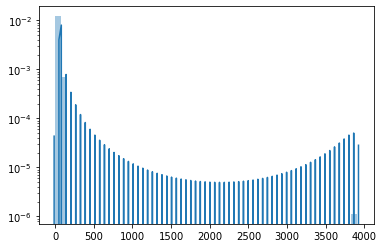

In [614]:
# for each tweet, create a vector that is a sum of all the cosine similarities for each keyword

def get_tweet_vec(tweet):
    cos_sim = np.array([token_keyword_sim[w] for w in tweet])
    if len(cos_sim.shape) == 2:
        tweet_sim = cos_sim.sum(axis=0)
        if sum(tweet_sim) > 3000:
            print(tweet)
        return(tweet_sim)
    else:

        return([])
   
tweet_sim = [get_tweet_vec(tweet) for tweet in tweet_tokens]
tweet_sim_arr = pd.DataFrame(list(filter(lambda x: len(x) == len(keywords), [get_tweet_vec(tweet) for tweet in tweet_tokens])))

# get a histogram of sums of vectors
ax = sns.distplot(tweet_sim_arr.sum(axis=1))
ax.set_yscale('log')



In [613]:
tweet_sim_arr.loc[tweet_sim_arr.sum(axis=1) > 3000]

0           1          2           3           4           5   \
7729  178.955758  177.847679  153.86699  171.683588  129.055967  184.187756   

              6           7           8           9   ...          11  \
7729  196.158536  206.237051  211.487667  214.004602  ...  221.289466   

              12          13          14          15          16         17  \
7729  210.775194  226.941152  241.549859  122.932005  168.962518  76.319655   

              18          19         20  
7729  142.599011  214.521937  198.38589  

[1 rows x 21 columns]

Part 3 : define the training, validation, and test sets, and represent documents as multiple words

In [379]:
# make a list of all vocabulary
vocab = list(tweet_embeddings_dict.keys())

# make a mapping of vocabulary to order in embedding file ("hash" of sorts)
vocab_map = dict(zip(vocab, range(len(vocab))))
vocab_reverse_map = dict(zip(range(len(vocab)), vocab))

# make train, valid, test sets
num_datapoints = len(tweet_tokens)

# set sizes of sets
train_size = round(0.7*num_datapoints)
valid_size = round(0.1*num_datapoints)
test_size = round(0.2*num_datapoints)

# determine document indices for each set
random.seed(5)
all_doc_idx_set = set(range(num_datapoints))
train_idx = np.random.choice(list(all_doc_idx_set), size=train_size, replace=False)
test_valid_doc_idx = list(all_doc_idx_set.difference(train_idx))
valid_idx = np.random.choice(test_valid_doc_idx, size=valid_size, replace=False)
test_idx = list(test_valid_doc_idx_set.difference(valid_idx))

print(len(train_idx))
print(len(valid_idx))
print(len(test_idx))
print(len(all_lda_tokens))

# create train, test, valid set dictionaries
# this is a weird format as required by the ETM module downloaded from Dieng, et al
def get_dataset(doc_df, idx):

    docs = doc_df.iloc[idx]
    token_ct_doc = [Counter(d) for d in docs]
    token_id = np.array([np.array([vocab_map[k] for k in c.keys()]) for c in token_ct_doc], dtype=object)
    token_ct = np.array([np.array(list(c.values())) for c in token_ct_doc], dtype=object)
    
    return({'tokens': token_id,
            'counts': token_ct})

    
tweet_token_df = pd.Series(tweet_tokens)
train_dict = get_dataset(tweet_token_df, train_idx)
valid_dict = get_dataset(tweet_token_df, valid_idx)
test_dict = get_dataset(tweet_token_df, test_idx)

# for some reason test set is further subdivided
size = round(test_size/2)
test_dict['tokens_1'] = test_dict['tokens'][:size]
test_dict['counts_1'] = test_dict['counts'][:size]
test_dict['tokens_2'] = test_dict['tokens'][size:]
test_dict['counts_2'] = test_dict['counts'][size:]
                                 


8202
1172
3138
11717


In [497]:
# write all these data/embeddings to file
all_datasets = {'train': train_dict,
                'validation' : valid_dict,
                'test' : test_dict,
                'vocab' : word_embed_df.T.index.values.tolist(),
                'train_idx': train_idx,
                'valid_idx': valid_idx,
                'test_idx': test_idx,
                'tweet_tokens': tweet_tokens}
with open('data/tweet_doc_word2vec_datasets.pkl', 'wb') as f:
    pickle.dump(all_datasets, f)

Part 3: Look at the embeddings alone, using PCA, followed by random forest model

In [477]:
# download the stop words
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))


def embed_document(token_list, embedding_dict):
    """
    Create an embedding vector for a text defined by a list of tokens
    
    Arguments:
        token_list: list of tokens that exist in word2vec
        embedding_dict: dictionary with keys that are tokens and values that are all a n-length vector (300 for word2vec)
        ##reducing_fct: how to reduce all the words in the sentence to one vector. Default is to sum along all elements
        
    Returns:
        n-length vector for entire sentence
    """
    token_list = [token if isinstance(token, str) else vocab_reverse_map.get(token) for token in token_list]
    token_list_no_stop = [token for token in token_list if token not in en_stop]
    embeddings = np.array([embedding_dict.get(token) for token in token_list_no_stop])
    return(np.sum(embeddings, axis=0))


embed_docs = list(filter(lambda x: len(x.shape) == 1, [embed_document(t, tweet_embeddings_dict) for t in train_dict['tokens']]))
embed_docs_arr = np.vstack(embed_docs)


embed_docs_all = list(filter(lambda x: len(x[1].shape) == 1, [(i, embed_document(tweet_tokens[i], tweet_embeddings_dict)) for i in range(num_datapoints)]))
embed_docs_idx = [x[0] for x in embed_docs_all]
embed_docs_all_arr = pd.DataFrame(np.vstack([x[1] for x in embed_docs_all]),
                                  index=embed_docs_idx)
embed_docs_all_arr.to_csv('data/word2vec_doc_embeddings.csv', header=False, index=True)


[nltk_data] Downloading package stopwords to /home/priyav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [478]:
def group_tweets(df, word_vars, 
                 impact_funcs, 
                 grouping_vars, grouping_func):
    """
    Scale tweets by some impact metric, create meta-variables, and aggregate by grouping_vars
    
    Arguments:
        df: pd.DataFrame of shape [n_tweets, n_attributes], where columns must include word_vars, grouping_vars, 
            and columns specified in impact_func
        word_vars: list of column names of predictors related to words (keywords, word embeddings) to be used for prediction
        impact_func: list of function on columns of df that will be multiplied by each of word_vars
        grouping_vars: list of column names in df to be used to group tweets
        grouping_func: list of functions taken by pd.DataFrame.groupby().agg()
       
    Returns:
        A pd.DataFrame of shape [n_unique_groups, len(word_vars)] of predictors 
        scaled by impact, grouped, and aggregated
    """
    if impact_funcs:
        impact_vals = [df.apply(f, axis=1) for f in impact_funcs]
        impact_tweets = pd.concat([df[word_vars].mul(impact_val, axis=0) for impact_val in impact_vals], axis=1)
        impact_tweets.columns = np.concatenate([["{}_func{}".format(c, i) for c in df[word_vars].columns] for i in range(len(impact_vals))])
    else:
        impact_tweets = df.drop(columns=grouping_vars)
        
    # group and aggregate
    per_group_impact_tweets = pd.concat([df[grouping_vars], impact_tweets], axis=1
                                       ).groupby(grouping_vars
                                                ).agg(grouping_func).reset_index()
    print(per_group_impact_tweets.head())
    per_group_impact_tweets.columns = ["_".join(x) for x in per_group_impact_tweets.columns.ravel()]
    
    return(per_group_impact_tweets)
    
    

# now calculate the encodings by date
embed_docs_all_arr.columns = ["col_{}".format(i) for i in embed_docs_all_arr.columns]
predictor_cols = ['retweet_count']
predictor_cols.extend(embed_docs_all_arr.columns)
grouping_cols = ['year', 'month', 'day']

embed_docs_dated = pd.concat([clean_tweets.iloc[embed_docs_idx][['year', 'month', 'day', 'retweet_count']], embed_docs_all_arr], axis=1)
embed_docs_by_date = group_tweets(embed_docs_dated, 
                   predictor_cols,
                   None,
                   grouping_cols,
                   ['sum'])

embed_docs_by_date['Date'] = embed_docs_by_date.apply(lambda x: datetime.date(int(x.year_), int(x.month_), int(x.day_)), axis=1)
embed_docs_by_date = embed_docs_by_date.drop(columns=["year_", "month_", "day_"])

# write aggregated embeddings to file
embed_docs_by_date.to_csv('data/word2vec_doc_embeddings.by_date.csv')


     year month   day retweet_count     col_0     col_1     col_2      col_3  \
                                sum       sum       sum       sum        sum   
0  2017.0   1.0  20.0        362593  2.732056  3.737000  4.154343  10.083298   
1  2017.0   1.0  21.0        103818 -0.992615  0.275459 -0.406769   4.552765   
2  2017.0   1.0  22.0        184236  2.428665  3.586517  1.278793   5.386154   
3  2017.0   1.0  23.0         26750  0.384293  2.010010  0.215881   0.339348   
4  2017.0   1.0  24.0         86707 -1.002075  3.399780  0.671143   2.765778   

      col_4     col_5  ...   col_290   col_291   col_292   col_293   col_294  \
        sum       sum  ...       sum       sum       sum       sum       sum   
0 -3.603363 -6.297546  ... -6.944550  4.418786 -7.487694  2.435574 -2.749002   
1 -0.149471 -1.220398  ...  0.003922  0.585587 -2.387352  0.031250 -1.078995   
2 -1.173454 -4.729156  ... -2.862122  0.191620 -5.816772 -0.430489  0.160120   
3 -0.147156 -1.100342  ... -0.781597 -0

AttributeError: ("'Series' object has no attribute 'year'", 'occurred at index year_')

In [495]:
# write aggregated embeddings to file
embed_docs_by_date.to_csv('data/word2vec_doc_embeddings.by_date.csv', index=False)


[0.25306624 0.05113744 0.03497355 0.03007244 0.02628771 0.02196358
 0.0204727  0.01664717 0.01604437 0.01482304 0.01313492 0.01181089
 0.01054957 0.00915269 0.0088652  0.00803886 0.00798663 0.00762901
 0.00750561 0.00719524 0.00698185 0.00662532 0.00630108 0.00589199
 0.00554937 0.00549025 0.0054115  0.00496713 0.00487705 0.00480374
 0.00472042 0.00455974 0.00453042 0.00438006 0.00436291 0.00426806
 0.00414112 0.00407722 0.00402574 0.0039126  0.00389955 0.00383891
 0.00370132 0.00367819 0.00361527 0.0035601  0.00346557 0.00341616
 0.00330308 0.00326717]


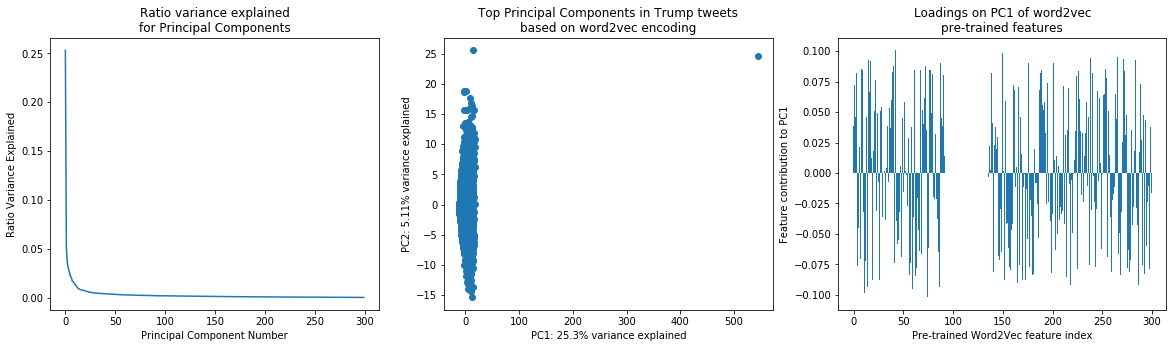

In [446]:
# PCA
scaler = StandardScaler()
scaler = scaler.fit(embed_docs_arr)
train_X_scaled = scaler.transform(embed_docs_arr)

pca = PCA().fit(train_X_scaled)
train_X_pca = pca.transform(train_X_scaled)
print(pca.explained_variance_ratio_[:50])
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
ax[0].set_xlabel("Principal Component Number")
ax[0].set_ylabel("Ratio Variance Explained")
ax[0].set_title("Ratio variance explained\nfor Principal Components")

ax[1].scatter(train_X_pca[:, 0], train_X_pca[:, 1])
ax[1].set_xlabel("PC1: {0:.3g}% variance explained".format(pca.explained_variance_ratio_[0]*100))
ax[1].set_ylabel("PC2: {0:.3g}% variance explained".format(pca.explained_variance_ratio_[1]*100))
ax[1].set_title("Top Principal Components in Trump tweets\nbased on word2vec encoding")


# figure out which dimensions contributing most
ax[2].bar(range(0, 300), pca.components_[0])
ax[2].set_xlabel("Pre-trained Word2Vec feature index")
ax[2].set_ylabel("Feature contribution to PC1")
ax[2].set_title("Loadings on PC1 of word2vec\npre-trained features")



plt.savefig("plots/word2vec_only_pca.png")

['retweet',
 'the',
 'rule',
 'law',
 'is',
 'our',
 'nation',
 'proud',
 'heritage',
 'it',
 'cornerstone',
 'freedom',
 'what',
 'guarantees',
 'equal',
 'justice']

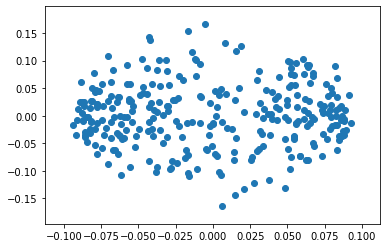

In [441]:
plt.scatter(pca.components_[0, :], pca.components_[1, :])
# print the tokens associated with the outlier tweet(s)
[vocab_reverse_map.get(t) for t in pd.DataFrame(train_dict['tokens']).iloc[3081][0]]
#np.where(train_X_pca[:,0] > 400)]

# Old stuff here #

In [181]:
text_no_retweet = [re.sub(r"RT @[\W\w]+:", "", t).strip() for t in tweets.text]



# initialize parser
parser = English()

# define function that will tokenize tweet text
# get data associated with URL only if indicated
def tokenize(text, get_url=False):
    lda_tokens = []
    
    if not isinstance(text, str):
        return []

    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            if get_url:
                lda_tokens.append(get_url_text(token))
            else:
                continue
        elif token.orth_.startswith('RT'):
            continue
        elif token.orth_.startswith('@'):
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

# define functions to lemmatize words
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    

# download the stop words
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

punctuation = ["+", " ", ":", ".", "..", "...", "....", "!", '"', "'", "-", "--", "&", "*", "_", "n\'t", "n't", "\'s", "amp"]

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    #tokens = TweetTokenizer().tokenize(text)
    tokens = [token.replace(".", "") for token in tokens]
    for p in punctuation:
        tokens = [token.strip(p) for token in tokens]
    tokens = [token for token in tokens if token not in punctuation]
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

# make a dataframe for all tokens mapping to all tweets
all_lda_tokens = [prepare_text_for_lda(t) for t in clean_tweets.clean_text]

all_lda_tokens_df = pd.concat([pd.DataFrame([all_lda_tokens[i],
                                             np.tile(i, len(all_lda_tokens[i]))],
                                            index=['token', 'document']).T for i in range(len(all_lda_tokens))])

all_lda_tokens_agg_df = all_lda_tokens_df.groupby(['token', 'document']).agg('size').reset_index()




[nltk_data] Downloading package stopwords to /home/priyav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [210]:
# do some manual filtering to remove some numbers, other languages, emojis
idx_to_drop = list(range(0, 1243)) + list(range(127167, 127181)) + [127198] + list(range(127099, 127130))
filtered_idx = all_lda_tokens_agg_df.index.drop(idx_to_drop)

all_lda_tokens_agg_df_filt = all_lda_tokens_agg_df.iloc[filtered_idx]

In [220]:
# write all terms to file to be used with the skipgram.py module
valid_tokens = all_lda_tokens_agg_df_filt.token.unique()
def final_filter_token(t):
    if t in valid_tokens:
        return t
    else:
        return ""
    
with open('/home/priyav/coursework/cs109a/project/TrumpTweets/tweets/ETM/data/trump/tokens.txt', 'w') as outfile:
    for token_list in all_lda_tokens:
        tokens = filter(lambda x: len(x) > 0, [final_filter_token(t) for t in token_list])
        outfile.write("{}\n".format(" ".join(tokens)))
        



8202
1172
2343
11717


In [179]:
all_lda_tokens_agg_df[127100:127183]
#[130000:130050]

token  document  0
127100             zing      5354  1
127101             zing      5384  1
127102             zing      5433  1
127103             zing      5545  1
127104             zing      5619  1
127105             zing      6196  1
127106             zing      6226  1
127107             zing      6359  1
127108             zing      6451  1
127109             zing      6542  1
127110             zing      6615  1
127111             zing      6852  1
127112             zing      7132  1
127113             zing      7405  1
127114             zing      7608  1
127115             zing      7820  1
127116             zing      8020  1
127117             zing      8061  1
127118             zing      8652  1
127119             zing      8674  1
127120             zing      8733  1
127121             zing      9209  1
127122             zing      9295  1
127123             zing      9595  1
127124             zing      9626  1
127125             zing      9911  1
127126             zing     10007  1
127127             zing     10024  1
127128             zing     10032  1
127129             zing     10043  1
...                 ...       ... ..
127153            zoldo      3040  1
127154             zone       146  1
127155             zone       191  1
127156             zone       286  1
127157             zone       287  1
127158             zone      1313  1
127159             zone      2519  1
127160             zone      4426  1
127161             zone      4534  1
127162             zone      5613  1
127163             zone      5637  1
127164             zone      6691  1
127165             zone      6977  2
127166             zone      6997  1
127167             zone      8806  2
127168             zone      8880  1
127169             zone      9085  1
127170             zone     10254  1
127171           zoning      4643  1
127172  zonwashingtonpo     10518  1
127173  zonwashingtonpo     10851  1
127174       ztpetrizzo       346  1
127175       ztpetrizzo       347  1
127176       ztpetrizzo       348  1
127177       ztpetrizzo       350  1
127178        ztrumplic      2144  1
127179           zucker       438  1
127180           zucker       446  1
127181       zuckerberg      1277  1
127182            zuker      8689  1

[83 rows x 3 columns]

In [104]:
mts = scipy.io.loadmat('/home/priyav/coursework/cs109a/project/TrumpTweets/tweets/ETM/data/20ng/bow_ts_counts.mat')['counts'].squeeze()
mva = scipy.io.loadmat('/home/priyav/coursework/cs109a/project/TrumpTweets/tweets/ETM/data/20ng/bow_va_counts.mat')['counts'].squeeze()
mtr = scipy.io.loadmat('/home/priyav/coursework/cs109a/project/TrumpTweets/tweets/ETM/data/20ng/bow_tr_counts.mat')['counts'].squeeze()

In [354]:
mts[1].shape


(1, 29)